___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [242]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [243]:
data = pd.read_csv("Ready_to_ML.csv")

In [244]:
df = data.copy()

In [245]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,Yes,120200.000,Manual,Diesel,Dealer,1595.000,5.000,98.000,Front,Alloy wheels,1270.000,No,Cloth,2.000,efficient,6.000,75.000,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,Yes,5000.000,Automatic,Electric,Dealer,1.000,1.000,0.000,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.000,No,Part/Full Leather,1.000,efficient,0.000,215.000,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,Yes,18900.000,Automatic,Benzine,Dealer,1991.000,8.000,162.000,4WD,Alloy wheels,1555.000,No,Part/Full Leather,2.000,unefficient,2.000,310.000,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,Yes,18995.000,Automatic,Benzine,Dealer,1991.000,7.000,169.000,4WD,Sport seats,1455.000,No,Part/Full Leather,2.000,unefficient,2.000,225.000,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,Yes,197000.000,Automatic,Diesel,Dealer,2143.000,7.000,162.000,4WD,Alloy wheels,1545.000,No,Part/Full Leather,2.000,unefficient,7.000,100.000,4.900,Standard,Standard,Safety Premium Plus Package


In [246]:
df.shape

(26711, 27)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [248]:
df.duplicated().sum()

1815

In [249]:
df.drop_duplicates(inplace=True)

In [250]:
df.duplicated().sum()

0

In [251]:
make_model_count=df.make_model.value_counts()
make_model_count

make_model
Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   2

In [252]:
drop_model = make_model_count[make_model_count <= 100].index
drop_model

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [253]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)

In [254]:
df

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,"Alloy wheels, Automatically dimming interior m...",1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,6.000,138.000,Front,"Alloy wheels, Automatically dimming interior m...",1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,Sport seats,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,Sport seats,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,Sport seats,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,Volvo V40,Volvo,"1000 Brussel, BE",13000.000,Sedan,Used,No,114000.000,Manual,Diesel,Private seller,1969.000,6.000,94.000,Front,"All season tyres, Ambient lighting, Cargo barr...",1532.000,Yes,Cloth,1.000,efficient,4.000,88.000,3.600,Standard,Standard,Safety Premium Package
18193,Volvo S60,Volvo,"CALLE CATALUNYA, 37, 8520 LLERONA, ES",4999.000,Sedan,Used,Yes,166512.000,Manual,Benzine,Dealer,2521.000,5.000,145.000,Front,Alloy wheels,1550.000,No,Part/Full Leather,3.000,efficient,18.000,154.000,9.100,Standard,Standard,Safety Premium Package
18194,Volvo S90,Volvo,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,4WD,Alloy wheels,2077.000,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,Volvo,"Sur rendez-vous, 5060 Sambreville, BE",7300.000,Sedan,Used,Yes,96000.000,Manual,Diesel,Dealer,1560.000,6.000,99.000,Front,"Alloy wheels, Automatically dimming interior m...",1356.000,Yes,Cloth,1.000,unefficient,11.000,84.000,3.800,Standard,Standard,Safety Premium Package


In [255]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,18197.000,18197.000,18197.000,18197.000,18197.000,18197.000,18197.000,18197.000,18197.000,18197.000
mean,20003.996,66124.962,1629.402,5.790,125.129,1362.953,1.425,4.897,109.053,5.341
std,12554.060,59338.301,696.494,1.315,48.899,252.408,0.818,4.340,55.260,2.075
min,490.000,0.000,0.000,1.000,0.000,695.000,1.000,0.000,43.000,0.000
25%,12444.000,19700.000,1229.000,5.000,104.000,1168.000,1.000,2.000,74.000,4.200
50%,17000.000,52000.000,1499.000,6.000,119.000,1331.000,1.000,4.000,96.000,5.000
75%,24980.000,97831.000,1968.000,6.000,139.000,1500.000,2.000,6.000,120.000,6.000
max,208101.000,600000.000,5812.000,8.000,399.000,2750.000,9.000,20.000,419.000,18.300


In [256]:
df.corr(numeric_only=True)

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
price,1.000,-0.513,0.473,0.298,0.155,0.588,-0.256,-0.526,0.687,0.165
mileage,-0.513,1.000,0.097,-0.075,0.143,0.012,0.360,0.743,-0.096,0.111
engine_size,0.473,0.097,1.000,0.105,0.623,0.570,0.062,0.180,0.805,0.627
gears,0.298,-0.075,0.105,1.000,0.106,0.375,-0.070,-0.127,0.275,0.083
co_emissions,0.155,0.143,0.623,0.106,1.000,0.306,0.117,0.331,0.515,0.805
empty_weight,0.588,0.012,0.570,0.375,0.306,1.000,-0.038,-0.037,0.677,0.266
previous_owner,-0.256,0.360,0.062,-0.070,0.117,-0.038,1.000,0.447,-0.022,0.118
age,-0.526,0.743,0.180,-0.127,0.331,-0.037,0.447,1.000,-0.033,0.337
power_kW,0.687,-0.096,0.805,0.275,0.515,0.677,-0.022,-0.033,1.000,0.554
cons_avg,0.165,0.111,0.627,0.083,0.805,0.266,0.118,0.337,0.554,1.000


## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

In [257]:
df["extras"]

0        Alloy wheels, Automatically dimming interior m...
1        Alloy wheels, Automatically dimming interior m...
2                                              Sport seats
3                                              Sport seats
4                                              Sport seats
                               ...                        
18192    All season tyres, Ambient lighting, Cargo barr...
18193                                         Alloy wheels
18194                                         Alloy wheels
18195    Alloy wheels, Automatically dimming interior m...
18196    Alloy wheels (18"), Automatically dimming inte...
Name: extras, Length: 18197, dtype: object

In [258]:
df.extras.str.count(",").add(1)

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

In [259]:
df["extras"].apply(lambda x: x.count(",")).add(1)

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

### Converting the Extras feature from object to numeric

In [260]:
df["extras"] = df["extras"].apply(lambda x: x.count(",")).add(1)

In [261]:
df.extras.nunique() 

21

In [262]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,6.000,138.000,Front,6,1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package


In [263]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

In [264]:
df_object = df.select_dtypes(include ="object").head()
df_object

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Compact,Used,No,Manual,Diesel,Dealer,Front,Yes,Cloth,unefficient,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,No,Cloth,unefficient,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,No,Cloth,unefficient,Standard,Standard,Safety Premium Package


## multicollinearity control

In [265]:
def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

# This function will return the correlation between independent features coloured based on their correlation strength.
# If the correlation is between (-0.90, +0.90), the value will be coloured red, otherwise black.

# Linear models (linear regression, ridge, lasso, elasticnet, logistic regression) are badly affected by multicollinearity.
# Regularisation models handle this problem gracefully as well as the overfitting situation.

In [266]:
df.corr(numeric_only=True).style.applymap(color_red)

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
price,1.000000,-0.512806,0.472763,0.298219,0.154896,0.326470,0.588013,-0.256245,-0.525858,0.687179,0.164896
mileage,-0.512806,1.000000,0.096988,-0.075386,0.142708,-0.176425,0.011683,0.359637,0.742675,-0.096395,0.111174
engine_size,0.472763,0.096988,1.000000,0.104819,0.623381,0.150075,0.570256,0.062210,0.179708,0.804989,0.627165
gears,0.298219,-0.075386,0.104819,1.000000,0.105622,0.188638,0.375265,-0.069685,-0.127089,0.274800,0.082923
co_emissions,0.154896,0.142708,0.623381,0.105622,1.000000,0.066954,0.305501,0.116515,0.331054,0.515299,0.804786
extras,0.326470,-0.176425,0.150075,0.188638,0.066954,1.000000,0.323238,-0.092745,-0.181164,0.282883,0.087471
empty_weight,0.588013,0.011683,0.570256,0.375265,0.305501,0.323238,1.000000,-0.037641,-0.036816,0.676901,0.265832
previous_owner,-0.256245,0.359637,0.062210,-0.069685,0.116515,-0.092745,-0.037641,1.000000,0.446526,-0.021639,0.117748
age,-0.525858,0.742675,0.179708,-0.127089,0.331054,-0.181164,-0.036816,0.446526,1.000000,-0.032599,0.336580
power_kW,0.687179,-0.096395,0.804989,0.274800,0.515299,0.282883,0.676901,-0.021639,-0.032599,1.000000,0.553695


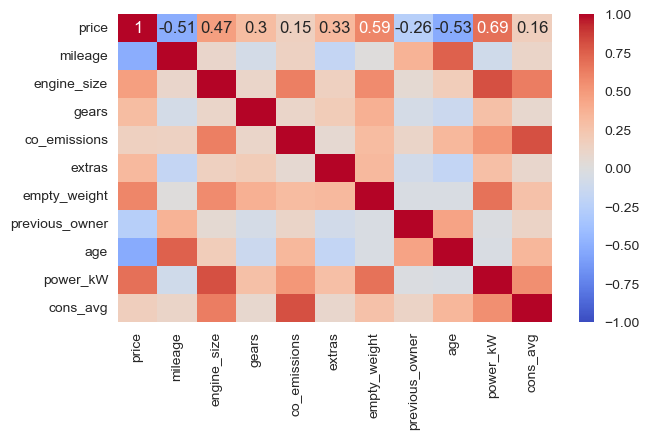

In [267]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show();

In [268]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [269]:
df_predictors = df.drop(columns=['price','make_model','body_type','type','warranty','gearbox','fuel_type','seller','drivetrain','full_service_history','upholstery','energy_efficiency_class','comfort_&_convenience_Package','entertainment_&_media_Package','safety_&_security_Package'])
predictors = df_predictors.columns

In [270]:
predictors

Index(['mileage', 'engine_size', 'gears', 'co_emissions', 'extras',
       'empty_weight', 'previous_owner', 'age', 'power_kW', 'cons_avg'],
      dtype='object')

In [271]:
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

In [272]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [variance_inflation_factor(df[predictors].values, i) for i in range(len(predictors))]

In [273]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,mileage,5.471
1,engine_size,25.196
2,gears,21.675
3,co_emissions,23.505
4,extras,2.781
5,empty_weight,38.758
6,previous_owner,4.799
7,age,6.880
8,power_kW,17.868
9,cons_avg,24.706


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
X = df.drop(columns="price", axis=1)
y = df["price"]

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (14557, 24)
Train target shape   :  (14557,)
Test features shape  :  (3640, 24)
Test target shape    :  (3640,)


## OneHotEncoder and OrdinalEncoder

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [278]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [279]:
df.select_dtypes(include="object").head(1)

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package


In [280]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']


In [281]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", 
                                       sparse_output=False), cat_onehot), 
                        (OrdinalEncoder(handle_unknown="use_encoded_value",
                                        unknown_value=-1,
                                        categories=[cat_for_type, 
                                                    cat_for_warranty,
                                                    cat_for_seller,
                                                    cat_for_service_history,
                                                    cat_for_upholstery,
                                                    cat_for_energy,
                                                    cat_for_comfort, 
                                                    cat_for_ent, 
                                                    cat_for_safety]), cat_ordinal),
                         remainder='passthrough', 
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [282]:
column_trans.fit_transform(X_train)

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,98027.000,1560.000,6.000,89.000,1,1472.000,3.000,7.000,84.000,3.900
14781,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,17195.000,1995.000,8.000,136.000,7,1826.000,1.000,1.000,140.000,5.200
2414,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000

In [283]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

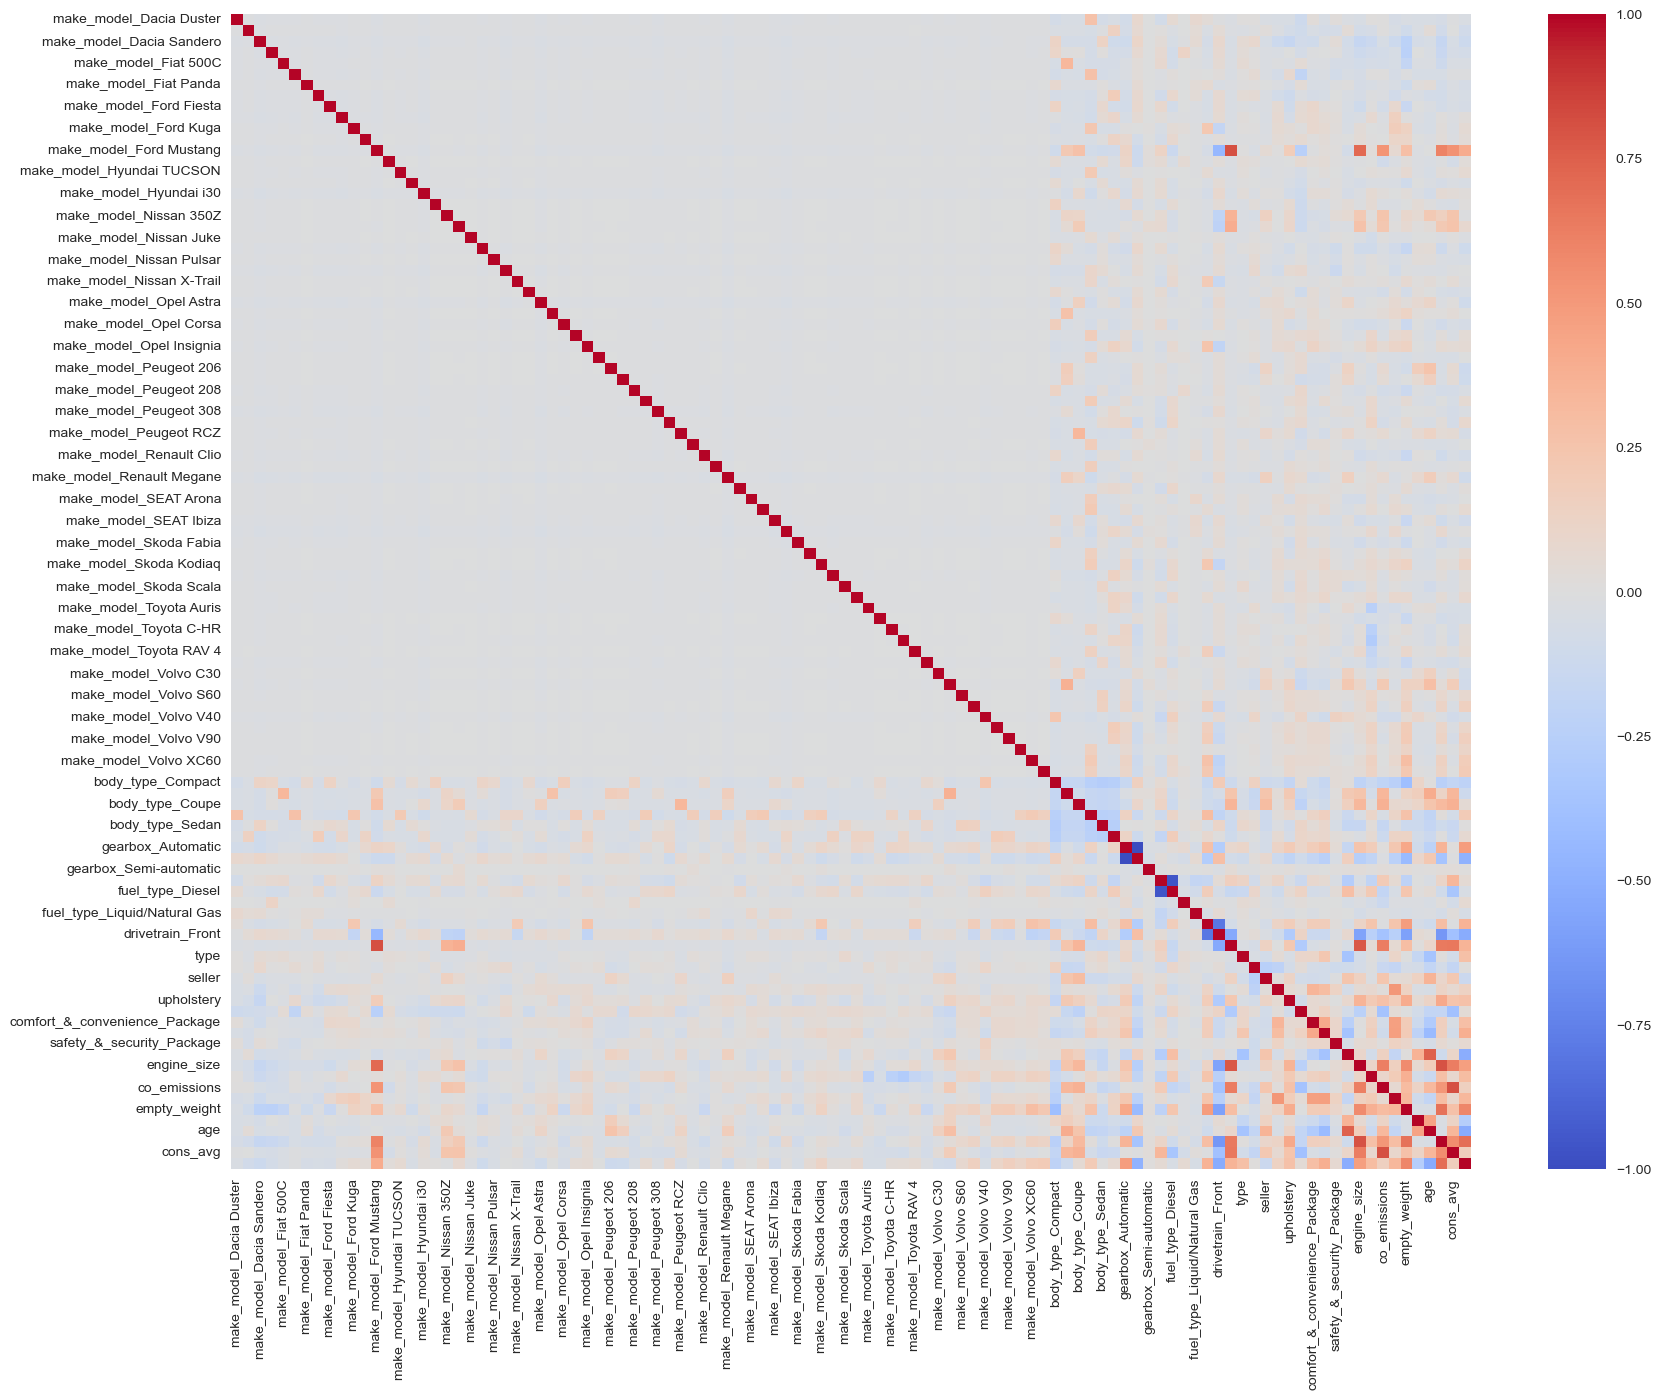

In [284]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");

## Scaling

In [285]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [286]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

**dummy uygulanmis sayisal sütunlarim varsa min-max scaling kullaniyorum. modelim araligi kücük olan feature icin büyük katsayi, araligi büyük olan feature icin kücük katsayi atama yapar, bu da feature önem derecesinde degisiklik yapar ve beni yaniltabilir, o yüzden min-max kullanmaliyim**

In [287]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_train_trans)

# DataFrame'e dönüştürme (isteğe bağlı)
#X_scaled_df = pd.DataFrame(X_scaled, columns=X_train_trans.columns)
#print(X_scaled_df)


## 3. Implement Linear Regression

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [289]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : root_mean_squared_error(y_train, y_train_pred),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : root_mean_squared_error(y_test, y_pred),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

def adj_r2(actual, prediction, X):
    r2 = r2_score(actual, prediction)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [290]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [291]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.831,0.831
mae,2855.057,2821.062
mse,27089834.704,24548395.821
rmse,5204.790,4954.634
mape,0.202,0.192


In [292]:
y_pred = lm.predict(X_test_scaled)
y_train_pred=lm.predict(X_train_scaled)

print("test adj_R2 score  :", adj_r2(y_test, y_pred, X_test_scaled))
print("train adj_R2 score :", adj_r2(y_train, y_train_pred, X_train_scaled))

test adj_R2 score  : 0.8255399352018309
train adj_R2 score : 0.8302750000370474


## Cross Validate

In [293]:
from sklearn.model_selection import cross_validate, cross_val_score

In [294]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)


# Creating a brand new model for cross validation.

# Set return_train_score=True to get the train score results of cross validation as well.

In [295]:
scores
# The scores are returned as a dictionary.

{'fit_time': array([0.05199552, 0.07682872, 0.10377932, 0.06255245, 0.09138417,
        0.10477662, 0.06251311, 0.16043162, 0.06280351, 0.0687499 ]),
 'score_time': array([0.00401306, 0.00458193, 0.00752354, 0.00551796, 0.00282121,
        0.00404096, 0.00854135, 0.00350523, 0.00351167, 0.00601864]),
 'test_r2': array([0.86331342, 0.85084766, 0.84056395, 0.84614996, 0.84467825,
        0.83117486, 0.79091525, 0.84797353, 0.78980521, 0.80913978]),
 'train_r2': array([0.82761695, 0.82947269, 0.83041867, 0.82995122, 0.83005871,
        0.83143136, 0.8365319 , 0.82974968, 0.8373821 , 0.83387947]),
 'test_neg_mean_absolute_error': array([-2995.31868132, -2768.88324176, -2873.97802198, -2792.3853022 ,
        -2795.88667582, -2854.76373626, -3020.34958791, -2708.51134021,
        -3014.15738832, -2922.50652921]),
 'train_neg_mean_absolute_error': array([-2844.68208534, -2879.98503931, -2870.73124189, -2860.65031295,
        -2859.91458667, -2854.90016029, -2831.19784749, -2877.35215998,
    

In [296]:
pd.DataFrame(scores, index = range(1,11))
# To make it easier to read, we turn the returned dictionary into a dataframe.

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.052,0.004,0.863,0.828,-2995.319,-2844.682,-23025205.648,-27563998.767,-4798.459,-5250.143,-0.218,-0.201
2,0.077,0.005,0.851,0.829,-2768.883,-2879.985,-19970197.062,-27923095.299,-4468.803,-5284.231,-0.201,-0.204
3,0.104,0.008,0.841,0.830,-2873.978,-2870.731,-23150898.280,-27556092.906,-4811.538,-5249.390,-0.216,-0.202
4,0.063,0.006,0.846,0.830,-2792.385,-2860.650,-22179748.741,-27650957.737,-4709.538,-5258.418,-0.200,-0.203
5,0.091,0.003,0.845,0.830,-2795.887,-2859.915,-22844611.248,-27579248.180,-4779.604,-5251.595,-0.197,-0.202
6,0.105,0.004,0.831,0.831,-2854.764,-2854.900,-29417139.863,-26846941.777,-5423.757,-5181.403,-0.207,-0.202
7,0.063,0.009,0.791,0.837,-3020.350,-2831.198,-38278825.784,-25873963.322,-6186.988,-5086.646,-0.209,-0.200
8,0.160,0.004,0.848,0.830,-2708.511,-2877.352,-21151088.752,-27772182.363,-4599.031,-5269.932,-0.197,-0.202
9,0.063,0.004,0.790,0.837,-3014.157,-2819.599,-43619744.214,-25295935.862,-6604.525,-5029.507,-0.199,-0.201
10,0.069,0.006,0.809,0.834,-2922.507,-2843.167,-31261247.774,-26650051.991,-5591.176,-5162.369,-0.188,-0.203


In [297]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

# Return the mean of the metrics we got from cross validation.

test_r2                                            0.831
train_r2                                           0.832
test_neg_mean_absolute_error                   -2874.674
train_neg_mean_absolute_error                  -2854.218
test_neg_mean_squared_error                -27489870.737
train_neg_mean_squared_error               -27071246.820
test_neg_root_mean_squared_error               -5197.342
train_neg_root_mean_squared_error              -5202.363
test_neg_mean_absolute_percentage_error           -0.203
train_neg_mean_absolute_percentage_error          -0.202
dtype: float64

In [298]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.831,0.831
mae,2855.057,2821.062
mse,27089834.704,24548395.821
rmse,5204.790,4954.634
mape,0.202,0.192


In [299]:
adj_r2(y_test, y_pred, X_test)

0.8294489988944039

## Prediction Error

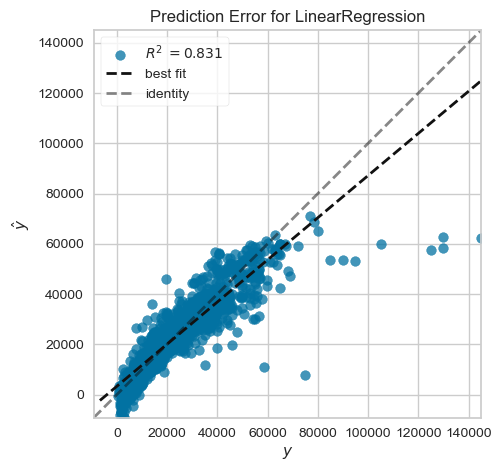

In [300]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();


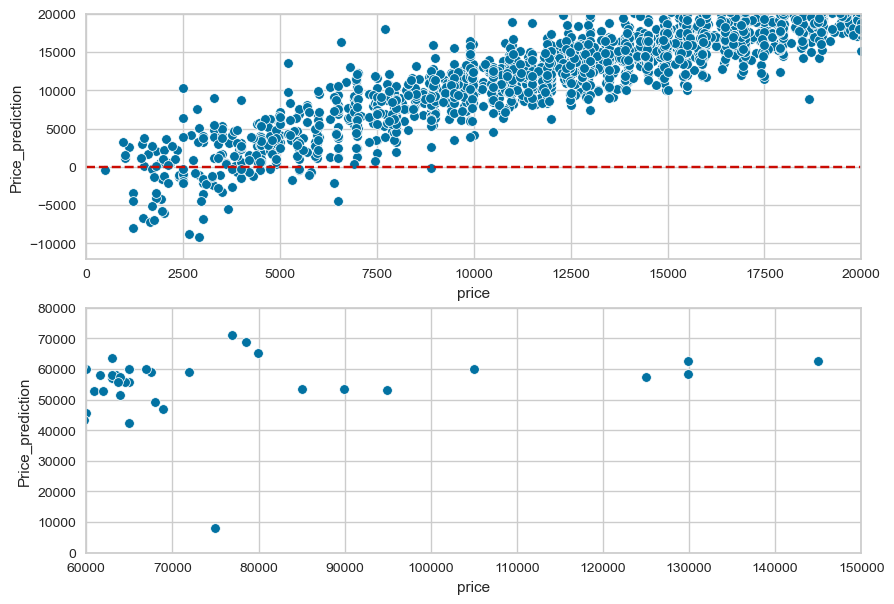

In [301]:
y_pred=lm.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) 
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("Price_prediction")
plt.xlim([0,20000])
plt.ylim([-12000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred)
plt.ylabel("Price_prediction")
plt.xlim([60000, 150000])
plt.ylim([0,80000])
plt.show();


## Residual Plot

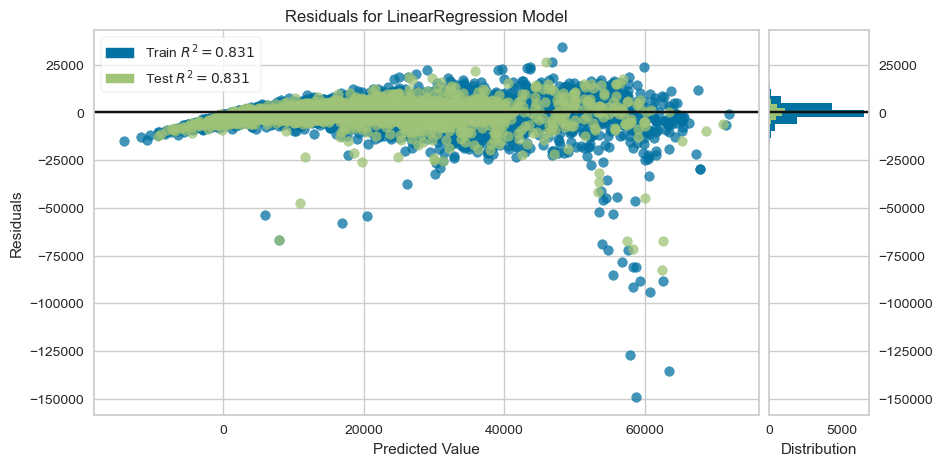

In [302]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# The data from the residual plot clearly shows that linear regression is not suitable for cheap and high priced cars.

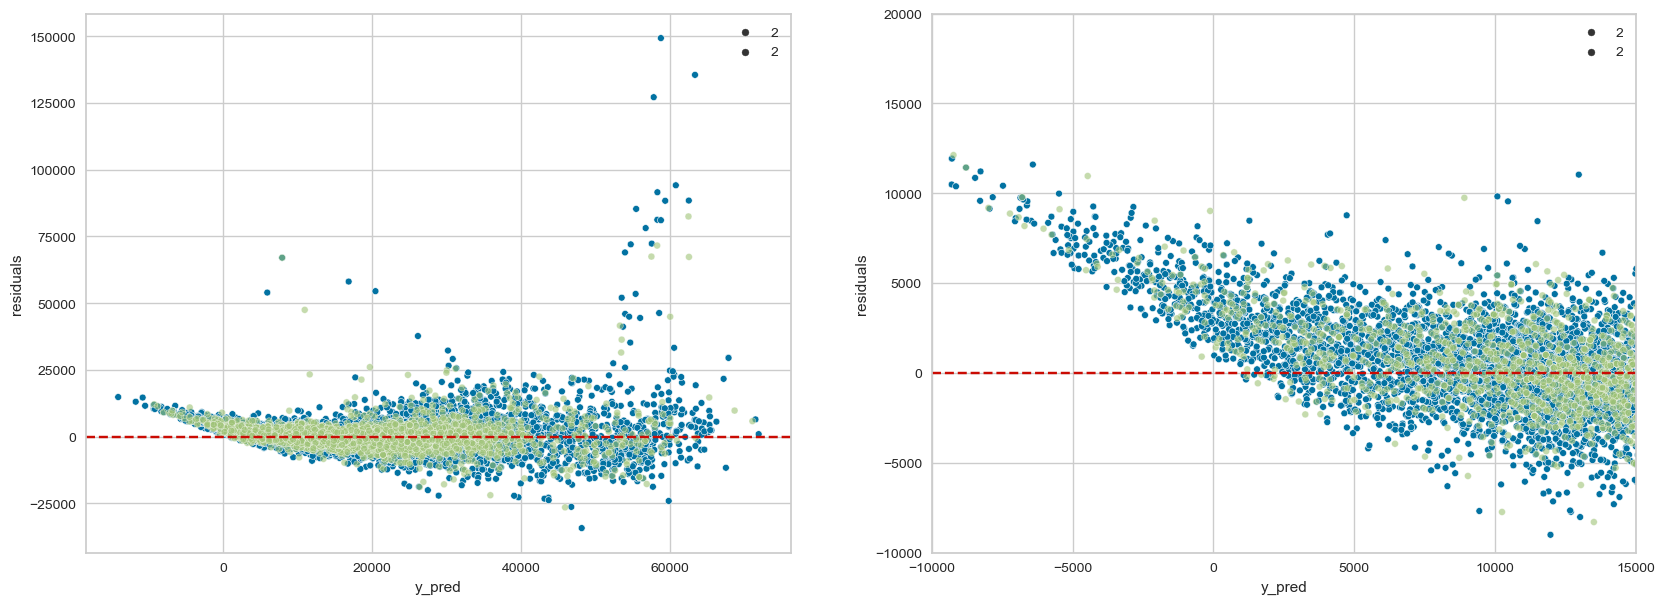

In [303]:
y_pred=lm.predict(X_test_scaled)
y_pred_train = lm.predict(X_train_scaled)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred_train, y = residual_train, color="b", size=2)
sns.scatterplot(x = y_pred, y = residual_test, color="g", size=2, alpha=0.6)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred_train, y = residual_train, color="b", size=2)
sns.scatterplot(x = y_pred, y = residual_test, color="g", size=2, alpha=0.6)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();


In [304]:
dict_train= {"y_train": y_train, "y_train_pred":y_pred_train}
dict_test={"y_test":y_test, "y_pred":y_pred}

In [305]:
df_train=pd.DataFrame(dict_train).sort_values(by="y_train")
df_train.head(100)

,y_train,y_train_pred
2104,699.000,-2944.000
2326,790.000,1156.000
2887,790.000,-2428.000
3938,790.000,-724.000
821,800.000,-14064.000
2182,890.000,-4932.000
3943,890.000,-2036.000
3845,890.000,-704.000
3925,900.000,-896.000
3631,950.000,1072.000


In [306]:
df_test=pd.DataFrame(dict_test).sort_values(by="y_test")
df_test.head(100)

,y_test,y_pred
2458,490.000,-416.000
3886,950.000,3260.000
3848,999.000,1196.000
3894,999.000,1576.000
3989,1100.000,2564.000
3788,1199.000,-4520.000
902,1200.000,-7984.000
2281,1200.000,-3432.000
3919,1400.000,1200.000
3993,1440.000,3032.000


**Not: datamin linear regressiopna uygun olup olmadigina bakmak icin sadece test datasina degil, train datasina da bakmaliyim**

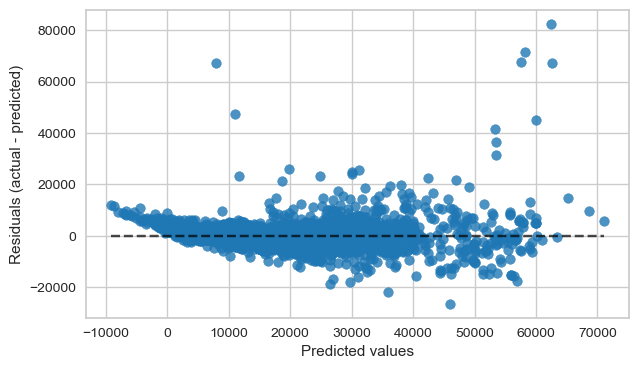

In [307]:
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

In [308]:
residuals = y_train - y_train_pred

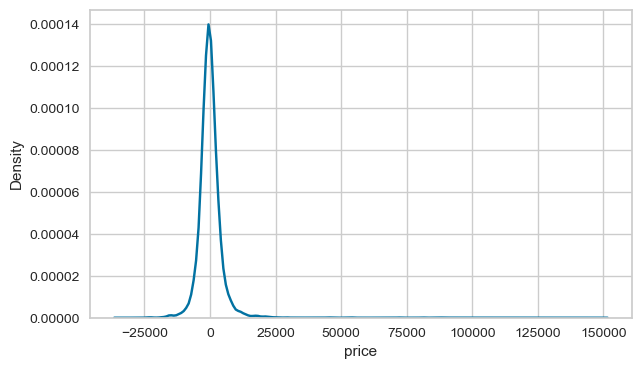

In [309]:
sns.kdeplot(residuals)
plt.show();

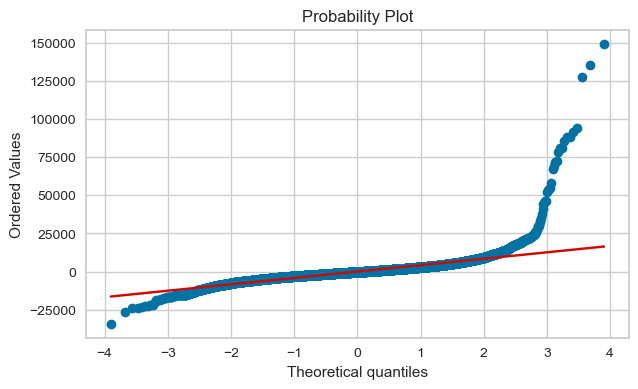

In [310]:
from scipy import stats
stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

# You can also check QQ-normality plot to check if residuals are normally distributed.

In [311]:

skew(residuals)

# Check the skewness of the residuals. This is another way of checking your data
# against normality, with a more formal mathematical calculation.
# If your skewness score is between [-1, 1], you could say that it's more or less normally distributed.
# 0 is the perfect score, means perfectly normally distributed, which you'll probably never get.

7.957459154410147

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [312]:
df = df[(df.price > 7500) & (df.price < 79000)]
df

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
2,Mercedes-Benz A 180,29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
5,Mercedes-Benz A 180,32900.000,Compact,Pre-registered,Yes,25.000,Manual,Benzine,Dealer,1332.000,6.000,126.000,Front,1,1350.000,No,Cloth,1.000,unefficient,1.000,100.000,0.000,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,Volvo S90,27190.000,Sedan,Used,Yes,93757.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,Front,1,1683.000,No,Part/Full Leather,1.000,efficient,4.000,140.000,4.400,Standard,Standard,Safety Premium Plus Package
18191,Volvo S90,27190.000,Sedan,Used,Yes,93757.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,Front,1,1683.000,No,Part/Full Leather,1.000,efficient,4.000,140.000,4.400,Standard,Standard,Safety Premium Plus Package
18192,Volvo V40,13000.000,Sedan,Used,No,114000.000,Manual,Diesel,Private seller,1969.000,6.000,94.000,Front,9,1532.000,Yes,Cloth,1.000,efficient,4.000,88.000,3.600,Standard,Standard,Safety Premium Package
18194,Volvo S90,37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,4WD,1,2077.000,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package


In [313]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [314]:
X_train_trans= column_trans.fit_transform(X_train)
X_test_trans= column_trans.transform(X_test)

In [315]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [316]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [317]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.870,0.878
mae,2631.405,2596.560
mse,15871565.304,14064425.122
rmse,3983.913,3750.257
mape,0.133,0.133


In [318]:
pd.options.display.float_format = '{:.3f}'.format

train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.870,0.878
mae,2631.405,2596.560
mse,15871565.304,14064425.122
rmse,3983.913,3750.257
mape,0.133,0.133


In [319]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.867
train_r2                                           0.870
test_neg_mean_absolute_error                   -2657.556
train_neg_mean_absolute_error                  -2632.746
test_neg_mean_squared_error                -16204556.618
train_neg_mean_squared_error               -15859659.685
test_neg_root_mean_squared_error               -4015.483
train_neg_root_mean_squared_error              -3982.284
test_neg_mean_absolute_percentage_error           -0.134
train_neg_mean_absolute_percentage_error          -0.133
dtype: float64

In [320]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

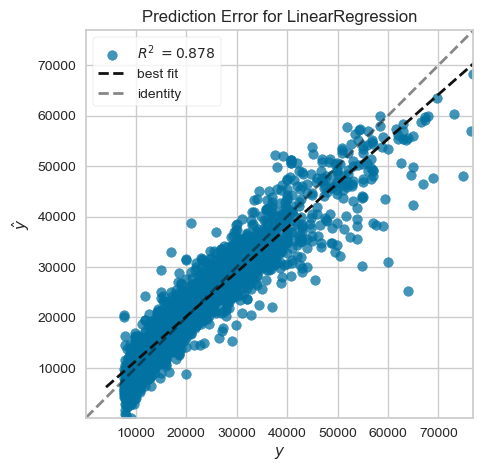

In [321]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and
# the identity line narrows even more.

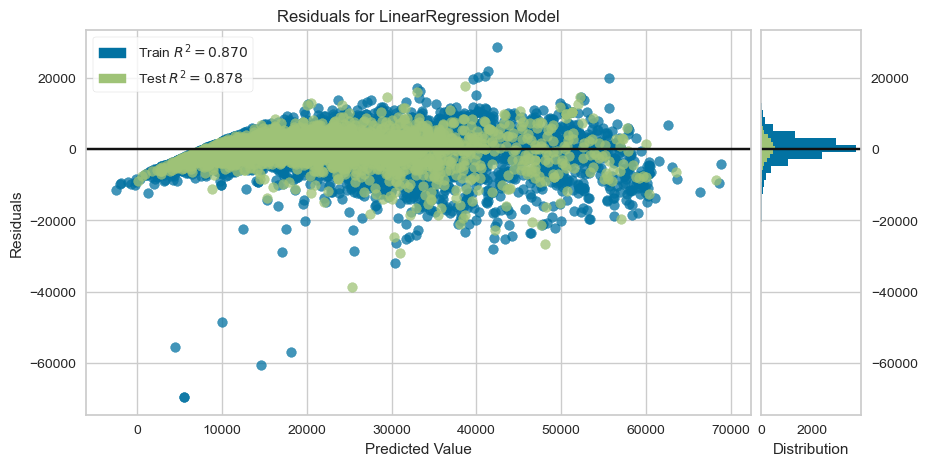

In [322]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# for cars priced at or around 7500 EURO, although our scores have improved
# still not suitable for linear regression.

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [323]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [324]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [325]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories=[cat_for_type,
                                         cat_for_warranty,
                                         cat_for_seller,
                                         cat_for_service_history,
                                         cat_for_upholstery,
                                         cat_for_energy,
                                         cat_for_comfort, 
                                         cat_for_ent, 
                                         cat_for_safety])
                                                    

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) # MinMaxScaler()

In [326]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [327]:
from sklearn.linear_model import Ridge
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [328]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.870,0.878
mae,2628.418,2593.681
mse,15873639.383,14079441.421
rmse,3984.174,3752.258
mape,0.133,0.133


## Cross Validation

In [329]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [330]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.088,0.018,0.886,0.868,-2686.587,-2626.520,-14471990.764,-16053532.113,-3804.207,-4006.686,-0.140,-0.132
2,0.108,0.016,0.852,0.872,-2586.985,-2631.506,-17565858.100,-15697178.254,-4191.164,-3961.966,-0.129,-0.133
3,0.109,0.012,0.867,0.870,-2518.425,-2645.560,-15298846.847,-15960634.641,-3911.374,-3995.076,-0.125,-0.134
4,0.121,0.018,0.868,0.870,-2784.654,-2608.874,-16887870.076,-15781125.535,-4109.485,-3972.546,-0.140,-0.132
5,0.114,0.018,0.878,0.869,-2614.932,-2634.698,-15074075.515,-15983307.267,-3882.535,-3997.913,-0.129,-0.133
6,0.079,0.017,0.869,0.870,-2672.066,-2622.933,-16525413.653,-15823164.747,-4065.146,-3977.834,-0.136,-0.132
7,0.080,0.014,0.829,0.875,-2767.023,-2607.182,-21612168.024,-15260859.421,-4648.889,-3906.515,-0.139,-0.132
8,0.093,0.014,0.881,0.869,-2577.816,-2638.686,-13625184.442,-16136776.549,-3691.231,-4017.061,-0.132,-0.133
9,0.088,0.014,0.895,0.867,-2558.020,-2643.773,-13233042.814,-16189684.016,-3637.725,-4023.641,-0.134,-0.133
10,0.077,0.013,0.850,0.872,-2764.333,-2616.436,-17648013.077,-15694689.887,-4200.954,-3961.652,-0.135,-0.132


In [331]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.867
train_r2                                           0.870
test_neg_mean_absolute_error                   -2653.084
train_neg_mean_absolute_error                  -2627.617
test_neg_mean_squared_error                -16194246.331
train_neg_mean_squared_error               -15858095.243
test_neg_root_mean_squared_error               -4014.271
train_neg_root_mean_squared_error              -3982.089
test_neg_mean_absolute_percentage_error           -0.134
train_neg_mean_absolute_percentage_error          -0.133
dtype: float64

## Finding best alpha for Ridge

In [332]:
from sklearn.model_selection import GridSearchCV
alpha_space = np.linspace(0.001, 100, 100)

In [333]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # # Parameter names should be used together with the model name defined
                                           # in the pipeline..

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [334]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [335]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_, 
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

,Coef
mileage,-23883.659
age,-17919.833
make_model_Nissan 370Z,-10030.281
make_model_Nissan 350Z,-6847.905
make_model_Ford Mustang,-6252.158
make_model_Dacia Sandero,-4596.560
make_model_Opel Adam,-4381.860
make_model_Opel Corsa,-4200.024
make_model_Toyota Aygo,-4134.346
cons_avg,-3760.216


In [336]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -4014.087
mean_train_score   -3980.997
Name: 0, dtype: object

In [337]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.870,0.878
mae,2630.991,2595.200
mse,15866429.734,14056874.164
rmse,3983.269,3749.250
mape,0.133,0.133


In [338]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [339]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([-1.83032972e+03, -2.87335783e+03, -4.59655987e+03, -2.83415763e+03,
       -6.23053725e+02, -6.30310067e+02, -2.86714696e+03, -3.56917404e+03,
       -2.90397019e+03, -1.29372334e+03, -5.49683498e+02, -5.44864600e+02,
       -6.25215825e+03, -5.90979530e+02,  2.40939047e+03, -3.08749421e+03,
       -2.68175096e+03,  4.75828454e+03, -6.84790543e+03, -1.00302814e+04,
       -1.36538266e+03, -3.48974152e+03, -2.66156128e+03,  1.33448020e+03,
        1.04216386e+03, -4.38185956e+03, -3.36412268e+03, -1.24865602e+03,
       -4.20002376e+03, -3.01150493e+02, -1.91962058e+03,  3.76591096e+02,
        7.10154851e+03, -2.36210863e+03, -2.00627418e+03,  3.51756818e+03,
       -4.90774586e+02,  3.15201802e+03, -6.69531012e+02, -8.99883434e+02,
       -1.42739024e+03, -4.37890475e+02, -6.83432937e+02, -2.55545093e+02,
       -1.05150263e+03,  2.34398385e+03, -2.73520595e+03, -2.50729693e+03,
       -2.73159109e+03,  4.10211691e+03,  8.18969950e+03,  1.12035532e+01,
       -1.92510919e+03,  

In [340]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['make_model_Dacia Duster', 'make_model_Dacia Logan',
       'make_model_Dacia Sandero', 'make_model_Fiat 500',
       'make_model_Fiat 500C', 'make_model_Fiat 500X',
       'make_model_Fiat Panda', 'make_model_Fiat Tipo',
       'make_model_Ford Fiesta', 'make_model_Ford Focus',
       'make_model_Ford Kuga', 'make_model_Ford Mondeo',
       'make_model_Ford Mustang', 'make_model_Hyundai IONIQ',
       'make_model_Hyundai TUCSON', 'make_model_Hyundai i20',
       'make_model_Hyundai i30', 'make_model_Mercedes-Benz A 180',
       'make_model_Nissan 350Z', 'make_model_Nissan 370Z',
       'make_model_Nissan Juke', 'make_model_Nissan Micra',
       'make_model_Nissan Pulsar', 'make_model_Nissan Qashqai',
       'make_model_Nissan X-Trail', 'make_model_Opel Adam',
       'make_model_Opel Astra', 'make_model_Opel Cascada',
       'make_model_Opel Corsa', 'make_model_Opel Grandland X',
       'make_model_Opel Insignia', 'make_model_Peugeot 2008',
       'make_model_Peugeot 206', 'make

In [341]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_, 
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

,Coef
mileage,-23883.659
age,-17919.833
make_model_Nissan 370Z,-10030.281
make_model_Nissan 350Z,-6847.905
make_model_Ford Mustang,-6252.158
make_model_Dacia Sandero,-4596.560
make_model_Opel Adam,-4381.860
make_model_Opel Corsa,-4200.024
make_model_Toyota Aygo,-4134.346
cons_avg,-3760.216


## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [342]:
from sklearn.linear_model import Lasso
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [343]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.870,0.878
mae,2630.511,2594.075
mse,15902719.948,14127112.108
rmse,3987.821,3758.605
mape,0.133,0.133


## Cross Validation

In [344]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [345]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.867
train_r2                                           0.870
test_neg_mean_absolute_error                   -2654.472
train_neg_mean_absolute_error                  -2629.519
test_neg_mean_squared_error                -16222437.000
train_neg_mean_squared_error               -15884763.544
test_neg_root_mean_squared_error               -4017.787
train_neg_root_mean_squared_error              -3985.437
test_neg_mean_absolute_percentage_error           -0.134
train_neg_mean_absolute_percentage_error          -0.133
dtype: float64

## Finding best alpha for Lasso

In [346]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}# Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [347]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [348]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -4014.087
mean_train_score   -3980.997
Name: 0, dtype: object

In [349]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.870,0.878
mae,2630.991,2595.200
mse,15866429.751,14056866.409
rmse,3983.269,3749.249
mape,0.133,0.133


In [350]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [351]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

,Coef
mileage,-23883.779
age,-17919.810
make_model_Nissan 370Z,-10027.081
make_model_Nissan 350Z,-6844.679
make_model_Ford Mustang,-6249.023
make_model_Dacia Sandero,-4593.351
make_model_Opel Adam,-4378.469
make_model_Opel Corsa,-4196.734
make_model_Toyota Aygo,-4130.881
cons_avg,-3759.900


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [352]:
from sklearn.linear_model import ElasticNet

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [353]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.442,0.461
mae,5890.771,5753.765
mse,68088204.183,62389871.964
rmse,8251.558,7898.726
mape,0.315,0.311


## Cross Validation

In [354]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [355]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.442
train_r2                                           0.443
test_neg_mean_absolute_error                   -5890.260
train_neg_mean_absolute_error                  -5887.063
test_neg_mean_squared_error                -68089721.121
train_neg_mean_squared_error               -68017904.250
test_neg_root_mean_squared_error               -8249.123
train_neg_root_mean_squared_error              -8247.261
test_neg_mean_absolute_percentage_error           -0.315
train_neg_mean_absolute_percentage_error          -0.315
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [356]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[0.5, 0.7, 0.9, 0.95, 0.99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [357]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
                                                                          'comfort_&_convenience_Package',
                                                                          'entertainment_&_media_Package',
                                                                          'safety_&_security_Package'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [358]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -4013.914
mean_train_score   -3981.427
Name: 3, dtype: object

In [359]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.870,0.878
mae,2629.181,2594.057
mse,15869834.239,14070942.108
rmse,3983.696,3751.125
mape,0.133,0.133


In [360]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [361]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
                         columns=["Coef"]
                         ).sort_values("Coef")

In [362]:
df_feat_imp

,Coef
mileage,-23883.779
age,-17919.810
make_model_Nissan 370Z,-10027.081
make_model_Nissan 350Z,-6844.679
make_model_Ford Mustang,-6249.023
make_model_Dacia Sandero,-4593.351
make_model_Opel Adam,-4378.469
make_model_Opel Corsa,-4196.734
make_model_Toyota Aygo,-4130.881
cons_avg,-3759.900


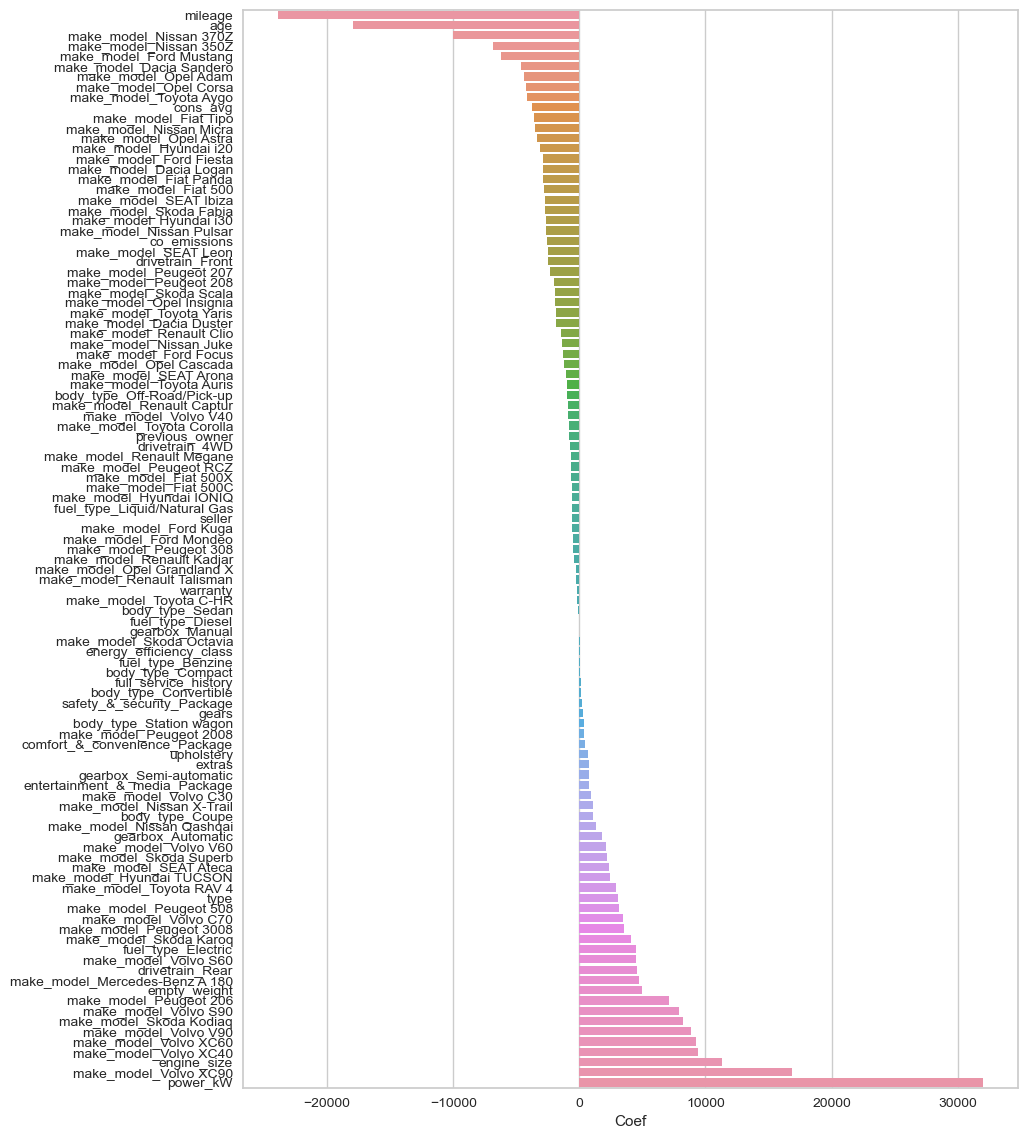

In [363]:
plt.figure(figsize=(10,14))
ax= sns.barplot(data= df_feat_imp, 
            x=df_feat_imp.Coef, 
            y=df_feat_imp.index)

In [400]:
lasso_grid_model.best_estimator_["Lasso"]

Lasso(alpha=0.001)

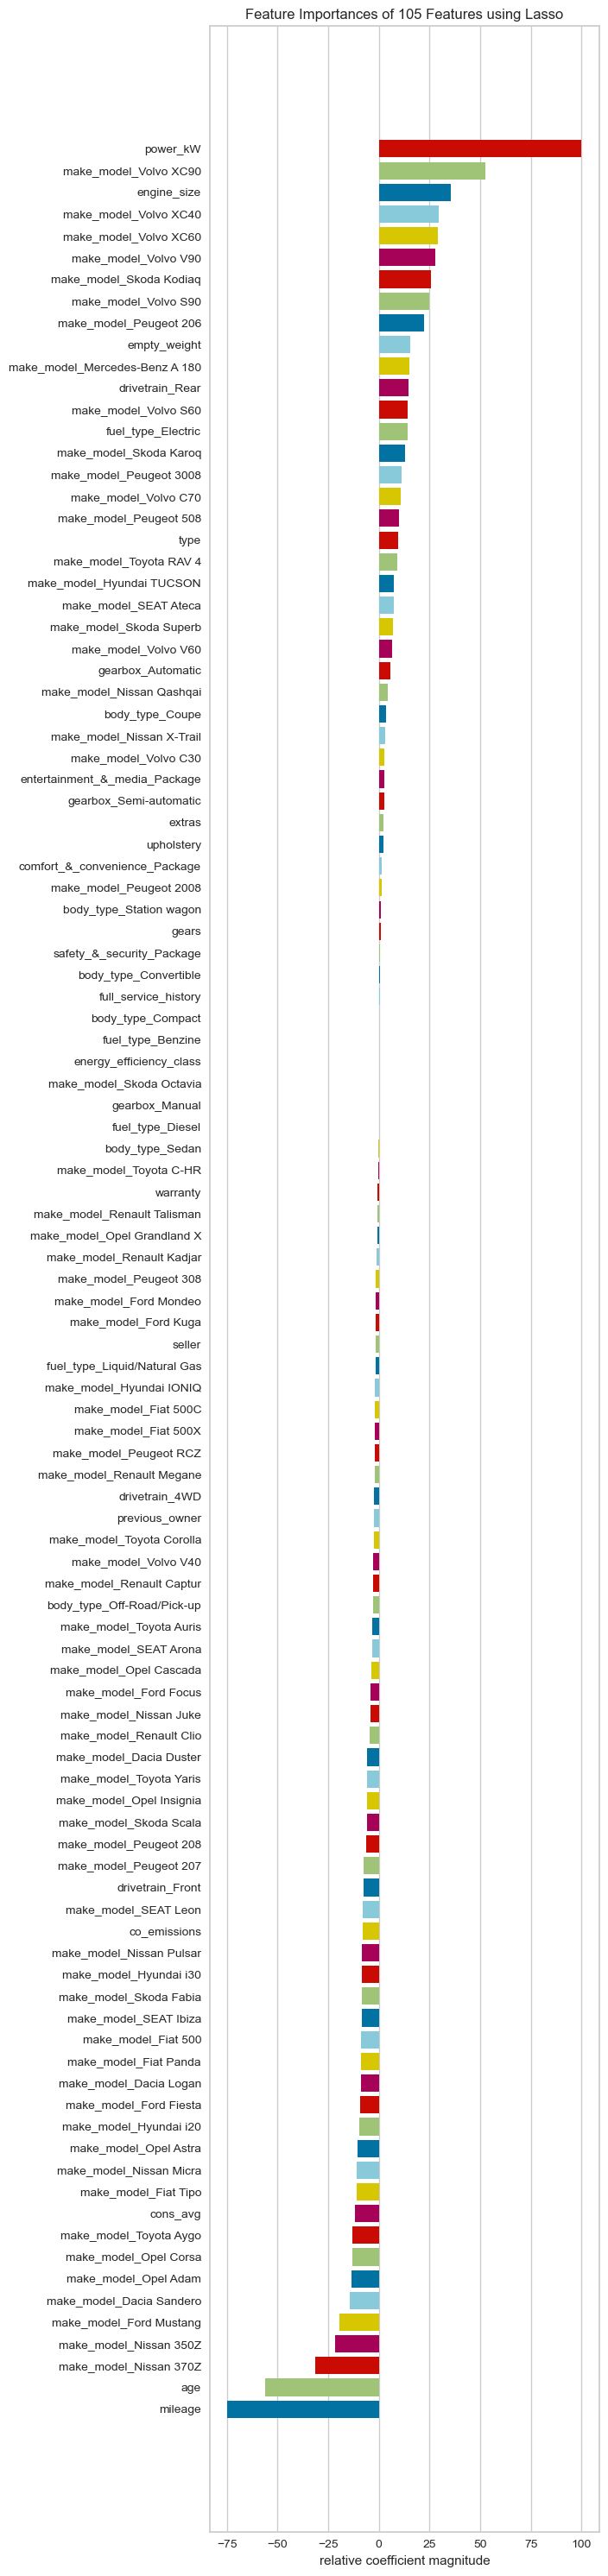

In [401]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"] # Lasso(alpha=0.001)

viz = FeatureImportances(model, 
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();


In [426]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

In [427]:
df_new

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered,32900.000
...,...,...,...,...,...,...,...
18190,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000


In [428]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [430]:
X_train.head()

,make_model,power_kW,mileage,age,engine_size,type
4206,Peugeot 208,98.500,52050.000,6.000,1560.000,Used
231,Opel Corsa,85.000,67066.000,7.000,999.000,Used
10882,Dacia Sandero,54.000,66481.000,4.000,1000.000,Used
12280,Nissan Micra,66.000,67093.000,4.000,1461.000,Used
8176,SEAT Leon,110.000,33950.000,2.000,1498.000,Used


In [431]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough', #MinMaxScaler()
                                        verbose_feature_names_out=False) 

In [469]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.856,0.862
mae,2807.710,2770.738
mse,17556166.214,15921388.455
rmse,4190.008,3990.161
mape,0.141,0.142


In [470]:
#df_2 = df[["make_model", "power_kW", "mileage","age", "engine_size", "price", "comfort_&_convenience_Package"]]

In [471]:
#X = df_2.drop(columns = ["price"])
#y = df_2.price

In [472]:
#df['comfort_&_convenience_Package'].value_counts()

In [473]:
#X = df_2.drop(columns = ["price"])
#y = df_2.price

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train.head()

#cat_onehot = ['make_model']
#cat_ordinal = ['comfort_&_convenience_Package']

#cat_for_type = ["Standard", "Premium", "Premium Plus"]

#column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       #(OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                       # remainder='passthrough', #MinMaxScaler()
                                       # verbose_feature_names_out=False) 



In [474]:
#operations = [("OneHot_Ordinal_Encoder", column_trans), 
              #("scaler", MinMaxScaler()), 
              #("Lasso", Lasso(alpha=0.001))]

#lasso_final_model = Pipeline(steps=operations)

#lasso_final_model.fit(X_train, y_train)
#train_val(lasso_final_model, X_train, y_train, X_test, y_test)

## Cross Validate

In [475]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [476]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.854
train_r2                                           0.856
test_neg_mean_absolute_error                   -2825.351
train_neg_mean_absolute_error                  -2807.222
test_neg_mean_squared_error                -17779116.043
train_neg_mean_squared_error               -17544538.271
test_neg_root_mean_squared_error               -4207.023
train_neg_root_mean_squared_error              -4188.497
test_neg_mean_absolute_percentage_error           -0.142
train_neg_mean_absolute_percentage_error          -0.141
dtype: float64

In [477]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [478]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare


,Model,r2_score,mae,rmse,mape
0,linear_m,0.878,2596.560,3750.257,0.133
1,ridge_m,0.878,2595.200,3749.250,0.133
2,lasso_m,0.878,2595.200,3749.249,0.133
3,elastic_m,0.878,2594.057,3751.125,0.133
4,final_m,0.862,2770.738,3990.161,0.142


In [479]:
compare.sort_values(by="r2_score", ascending=False)

,Model,r2_score,mae,rmse,mape
2,lasso_m,0.878,2595.200,3749.249,0.133
1,ridge_m,0.878,2595.200,3749.250,0.133
0,linear_m,0.878,2596.560,3750.257,0.133
3,elastic_m,0.878,2594.057,3751.125,0.133
4,final_m,0.862,2770.738,3990.161,0.142


In [480]:
compare.sort_values(by="mae", ascending=True) #  ascending=True sorts in ascending (low-->high) order.

,Model,r2_score,mae,rmse,mape
3,elastic_m,0.878,2594.057,3751.125,0.133
2,lasso_m,0.878,2595.200,3749.249,0.133
1,ridge_m,0.878,2595.200,3749.250,0.133
0,linear_m,0.878,2596.560,3750.257,0.133
4,final_m,0.862,2770.738,3990.161,0.142


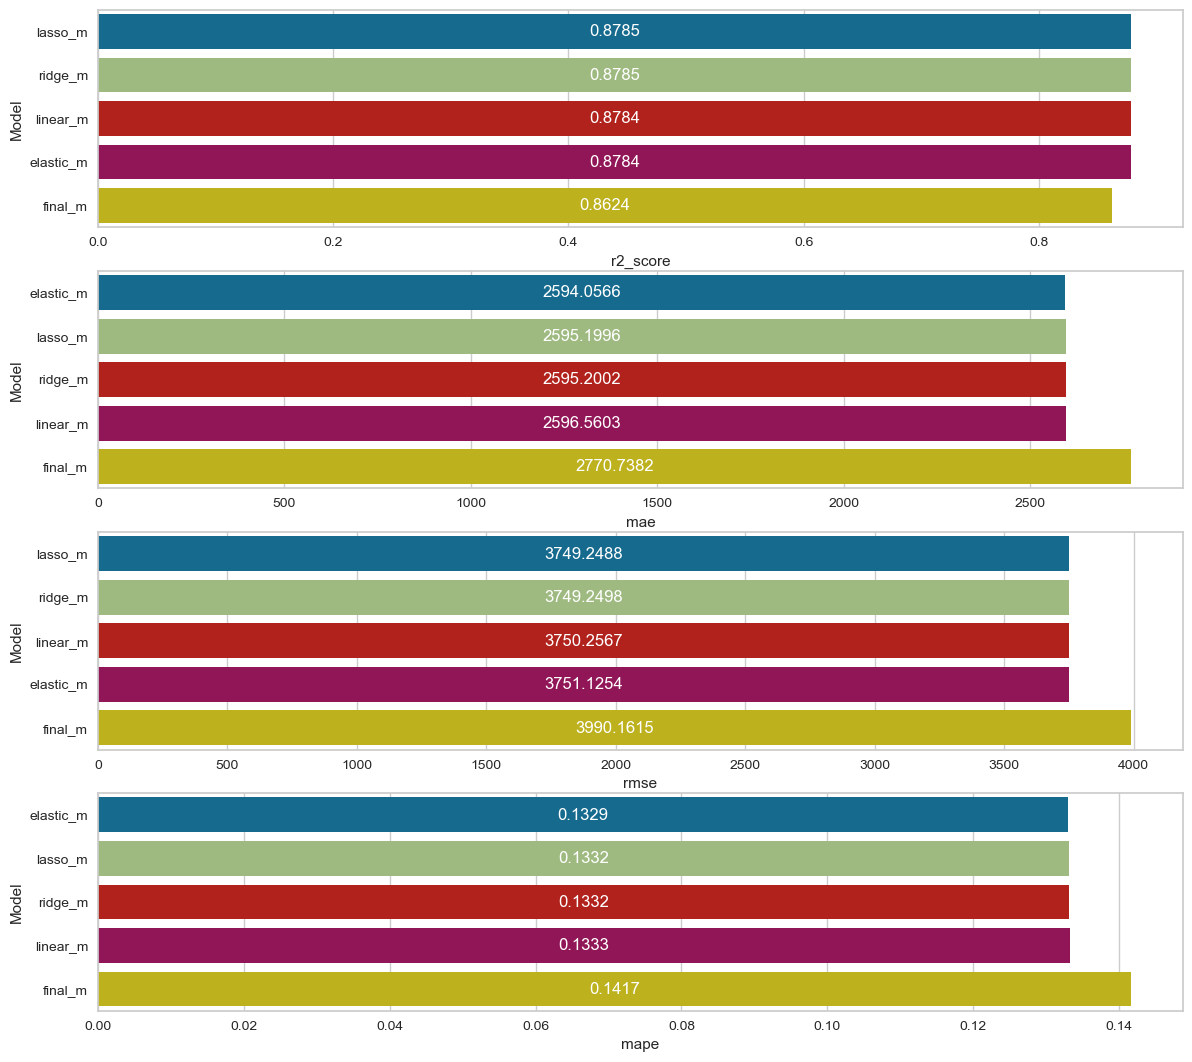

In [481]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")
plt.show();

## Prediction a new observation
- Create an observation and predict its price

In [443]:
df_new

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered,32900.000
...,...,...,...,...,...,...,...
18190,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000


In [444]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# After trying all models and deciding on the model with the most optimal score,
# we separate the data we use for this model as X and y.
# Note that we do not distinguish between train and test sets in the final stage.

In [445]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

# After comparing the scores in the table above, we decide on the Lasso model,
# which consists of 6 features, as our final model.
# In the lasso model with 6 features, we re-build the model with the hyperparameter, where we get the best score.

In [446]:
final_model.fit(X, y)

# What does final_model.fit(X,y) do in order?
# 1. Since the first operation to be done in final_model is column_trans;
#    a. Onehotencoder transformation is applied to the features in X data that will be transformed (cat_onehot) 
#       according to the information of X data.
#    b. Ordinalencoder transformation is applied to the features in X data that will be transformed (cat_ordinal) 
#       according to the information of X data.
#    c. No operation is performed on the numeric features other than the features that have been transformed. They are
#       left as they are.
# 2. Since the second operation to be done in final_model is MinMaxScaler();
#    a. Minmax scale is applied to the new numeric X we obtained after the transformation according to the min and max
#       information of X data. Minmaxscale was applied so that the observations consisting of 0 and 1 in our data remain
#       as 0 and 1.
# 3. Since the third operation to be done in final_model is Lasso();
#    a. The transformed and scaled X is given to the Lasso model along with y and the training is completed.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [459]:
X

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered
...,...,...,...,...,...,...
18190,Volvo S90,140.000,93757.000,4.000,1969.000,Used
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used


In [464]:
my_dict = {
    "make_model": 'Volvo S90',
    "power_kW": 170,
    "mileage": 20000,
    "age": 2,
    "engine_size": 2000,
    "type": "Used"
}

In [465]:
X.tail()

,make_model,power_kW,mileage,age,engine_size,type
18190,Volvo S90,140.000,93757.000,4.000,1969.000,Used
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used
18196,Volvo S90,187.000,94343.000,5.000,1969.000,Used


In [466]:
new_obs = pd.DataFrame([my_dict])
new_obs


,make_model,power_kW,mileage,age,engine_size,type
0,Volvo S90,170,20000,2,2000,Used


In [467]:
final_model.predict(new_obs)

array([43910.31065487])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___